In [1]:
# General
import numpy as np
import random
from IPython.display import clear_output
from tqdm import tqdm_notebook
tqdm_notebook()
import time
import matplotlib as mpl
from datetime import datetime
import pandas as pd
import os

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# Algorithms
from scipy.optimize import curve_fit
import statsmodels.api as sm

/var/folders/my/1126m1255k36stt7f2r98h_w0000gq/T/ipykernel_33200/557712747.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm_notebook()


0it [00:00, ?it/s]

In [2]:
# General
root_path = '../'
data_path = 'Data/'

# Prepared Data
prepared_data_path = 'Prepared Data/'
plotting_path = root_path+'Plots/'

aggregateTS = pd.DataFrame(columns=['Timestamp'])
plt.rcParams['figure.dpi'] = 180
plt.rcParams['figure.figsize'] = (25,15)

In [6]:
class DLA:
    def __init__(self):

        self.instantiate(100, 2000, mode='Default')

    def instantiate(self, _shape, _particles, mode='Custom', verbose=False):

        self.canvas_mode = mode
        self.shape = _shape
        self.particles = _particles

        self.canvas = np.zeros([self.shape, self.shape])
        self.canvas[int(self.shape/2)][int(self.shape/2)] = 1

        # length : 4(n-1)
        self.boundary_points = [(w, h) for w in [0, self.shape-1] for h in range(0, self.shape)]
        self.boundary_points += [(h, w) for w in [0, self.shape-1] for h in range(0, self.shape)]
        self.boundary_points = set(self.boundary_points)
        self.boundary_points = [list(e) for e in self.boundary_points]
        self.cache = []
        if verbose:
            print('Number of Spawning points for a player : ', len(self.boundary_points))

    def spawnParticle(self):

        if self.boundary_points == []:
            spawnIdx = -999
            return spawnIdx
        spawnIdx = random.choice(self.boundary_points)

        while self.canvas[spawnIdx[0], spawnIdx[1]] != 0:

            spawnIdx = random.choice(self.boundary_points)

        return spawnIdx

    def checkState(self, idx, _stck=0.005):
        allProximities = set([(idx[0]+i, idx[1]+e) for i in [0, 1, -1] for e in [0, 1, -1]])
        allProximities = [list(e) for e in allProximities if e != tuple(
            idx) if (0 <= e[0] < self.shape) and (0 <= e[1] < self.shape)]
        allVacantProximities = [e for e in allProximities if self.canvas[e[0]][e[1]] == 0]

        if sum([self.canvas[e[0]][e[1]] for e in allProximities]) == 0:
            return True, random.choice(allProximities)
        else:
            if random.random() < _stck:
                return False, [-999, -999]
            else:
                if allVacantProximities != []:
                    return True, random.choice(allVacantProximities)
                else:
                    print('Nowhere to go!')
                    return False, [-999, -999]

    def initiate(self, stickiness=0.005):  ## 0.005 ## 0.05 ##

        for eachParticles in tqdm_notebook(range(self.particles)):

            inMotion = True
            spawnP_Idx = self.spawnParticle()
            
            if spawnP_Idx == -999:
                print('No boundary point left. Terminating!')
                break

            self.canvas[spawnP_Idx[0], spawnP_Idx[1]] = 1

            while inMotion:

                inMotion, nextMove = self.checkState(spawnP_Idx, stickiness)

                if inMotion:
                    self.canvas[spawnP_Idx[0], spawnP_Idx[1]] = 0
                    self.canvas[nextMove[0], nextMove[1]] = 1
                    spawnP_Idx = nextMove

                else:
                    if spawnP_Idx in self.boundary_points:
                        self.boundary_points.remove(spawnP_Idx)
                        print(len(self.boundary_points))
                    break

            t = self.canvas.copy()
            aggregateTS.loc[eachParticles, 'Timestamp'] = datetime.now()
            self.cache.append(t)
            
        return self.canvas

In [7]:
dlaSim = DLA()
p = 10000
s = 300

dlaSim.instantiate(s, p, verbose=True)
canvas = dlaSim.initiate()

Number of Spawning points for a player :  1196


/var/folders/my/1126m1255k36stt7f2r98h_w0000gq/T/ipykernel_33200/2677371470.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for eachParticles in tqdm_notebook(range(self.particles)):


  0%|          | 0/10000 [00:00<?, ?it/s]

/var/folders/my/1126m1255k36stt7f2r98h_w0000gq/T/ipykernel_9944/4155875370.py:7: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("plasma").copy()
  cmap.set_under(color='black')
/var/folders/my/1126m1255k36stt7f2r98h_w0000gq/T/ipykernel_9944/4155875370.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(canvas, cmap=cmap, vmin = 0.0001)


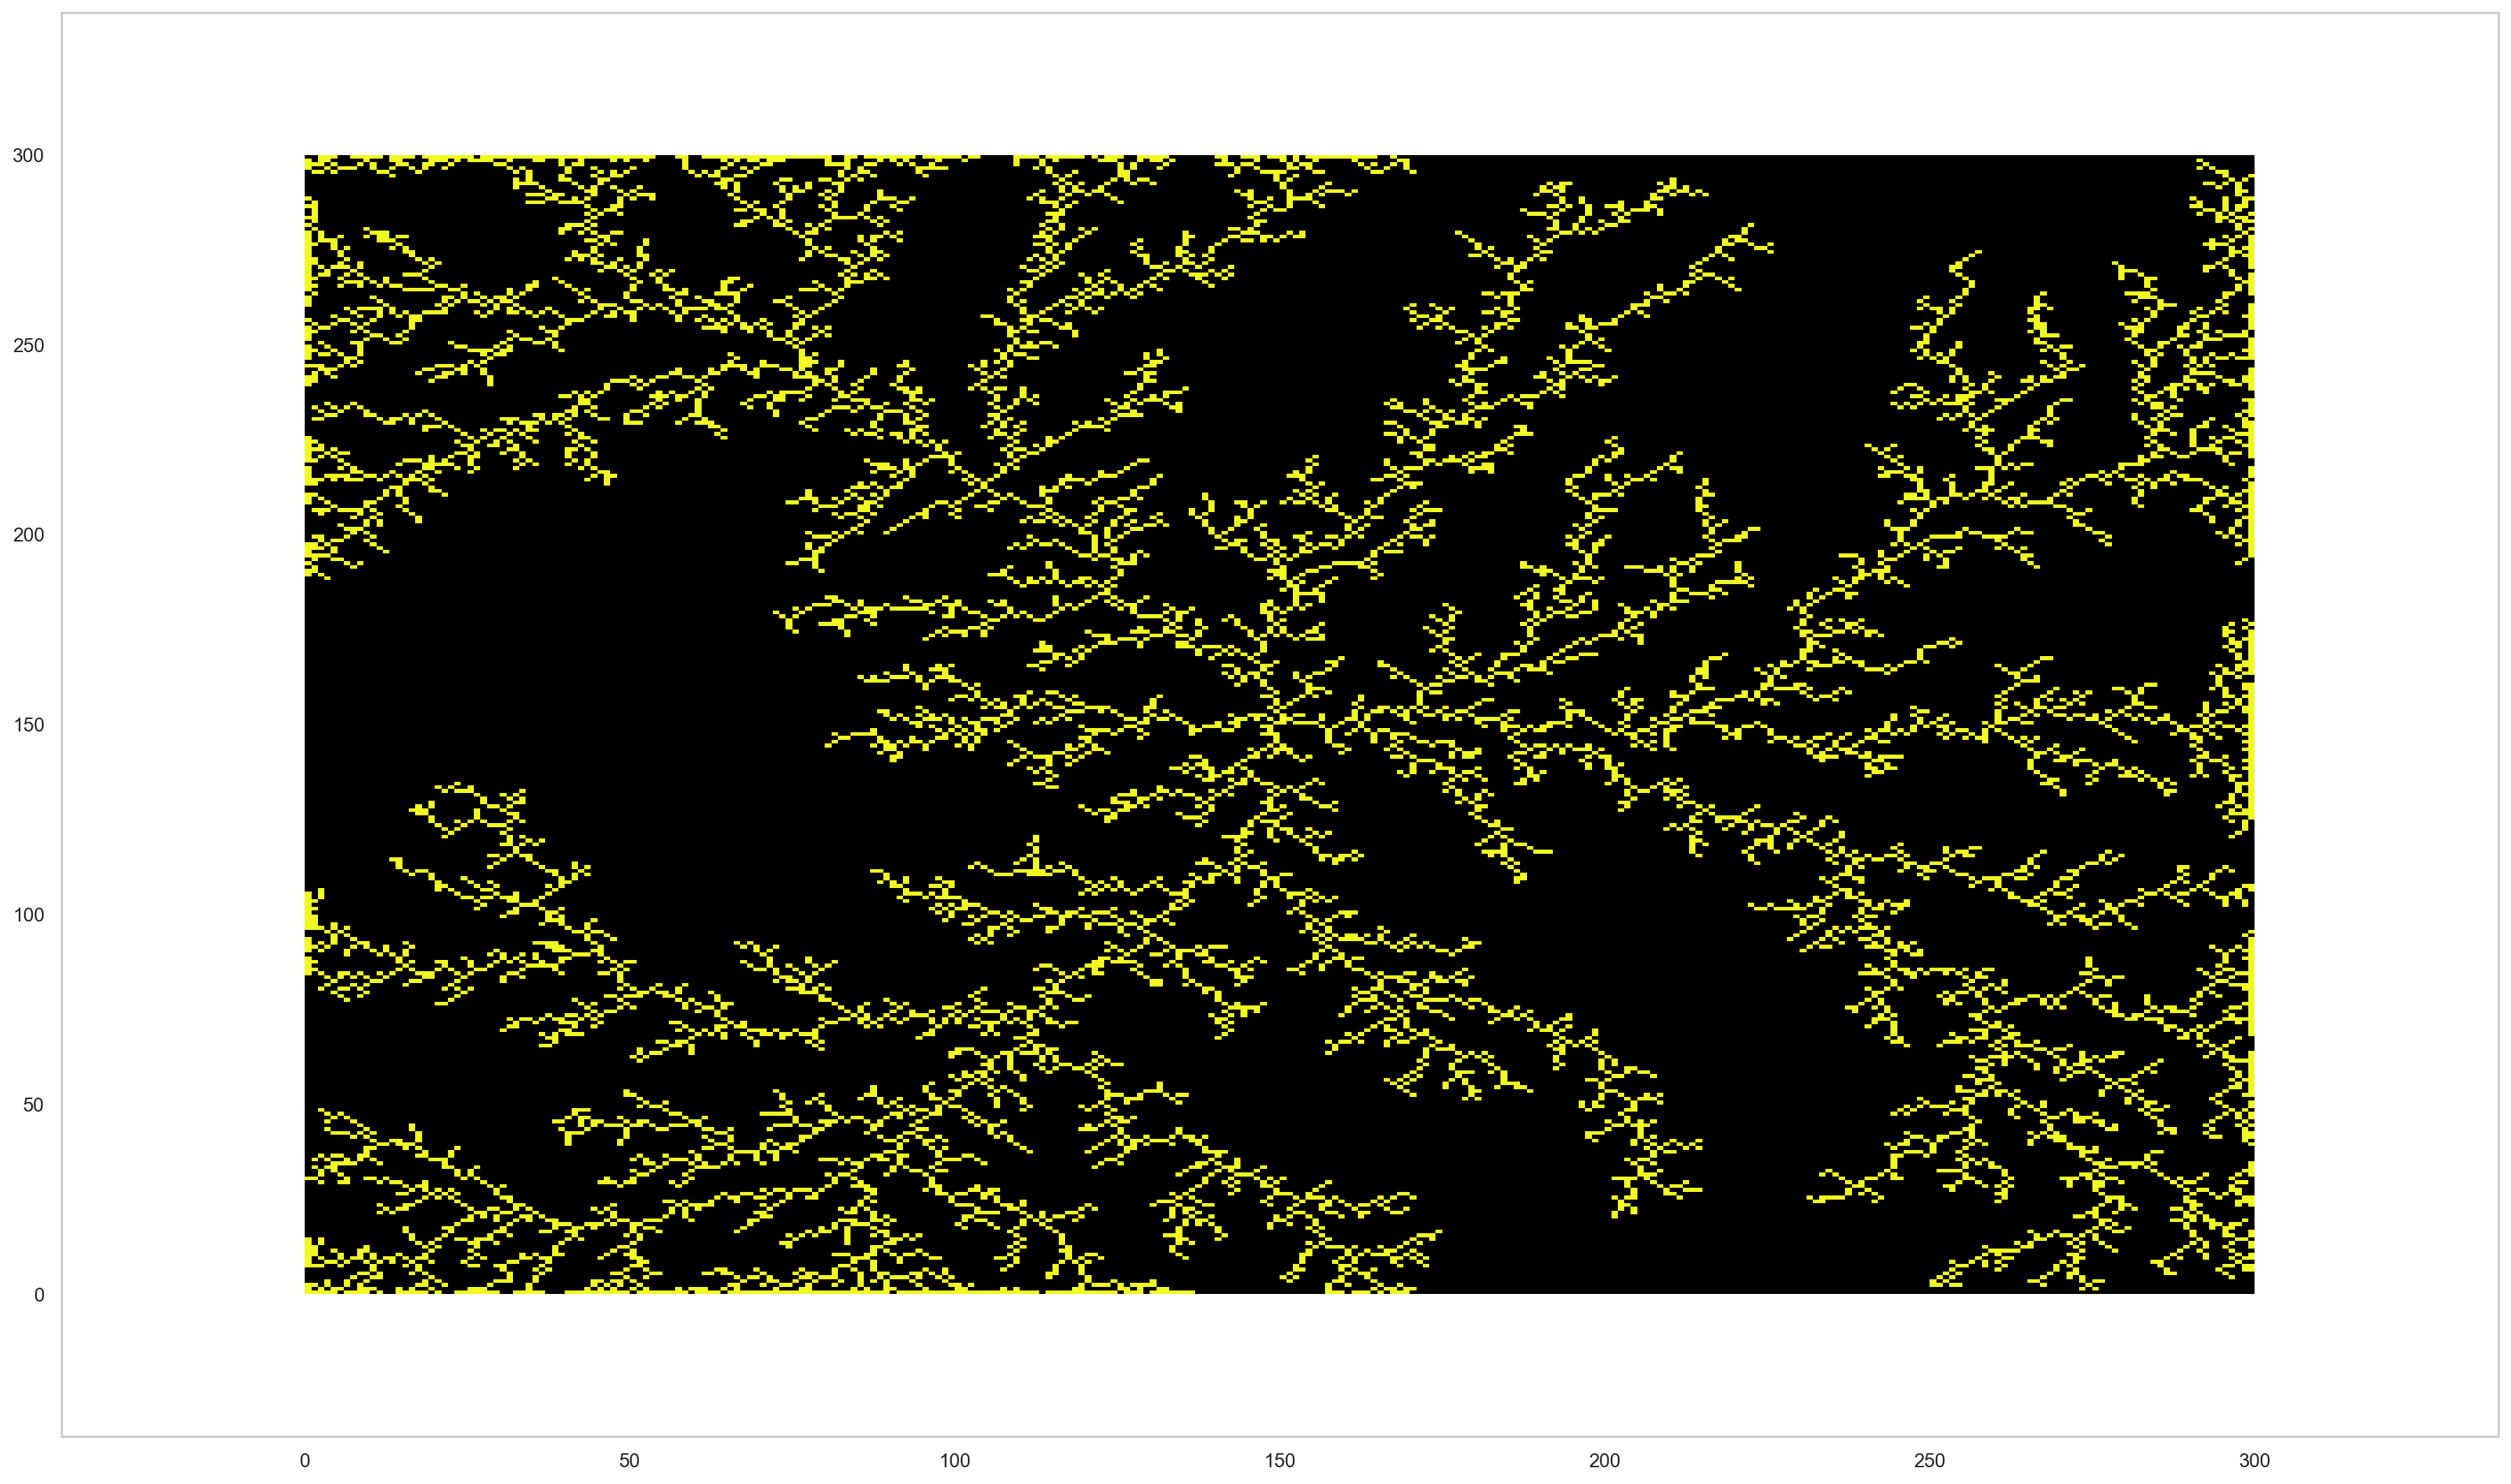

In [12]:
## with sticking prob 1 

latticeRadiusMax=150
length=300
plt.figure()
cmap = plt.cm.plasma
cmap.set_under(color='black')
plt.pcolormesh(canvas, cmap=cmap, vmin = 0.0001)
plt.xlim((length/2)-(latticeRadiusMax*1.25),(length/2)+(latticeRadiusMax*1.25))
plt.ylim((length/2)-(latticeRadiusMax*1.25),(length/2)+(latticeRadiusMax*1.25))
plt.pause(0.1)

/var/folders/my/1126m1255k36stt7f2r98h_w0000gq/T/ipykernel_33200/2846837790.py:7: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("plasma").copy()
  cmap.set_under(color='black')
/var/folders/my/1126m1255k36stt7f2r98h_w0000gq/T/ipykernel_33200/2846837790.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(canvas, cmap=cmap, vmin = 0.0001)


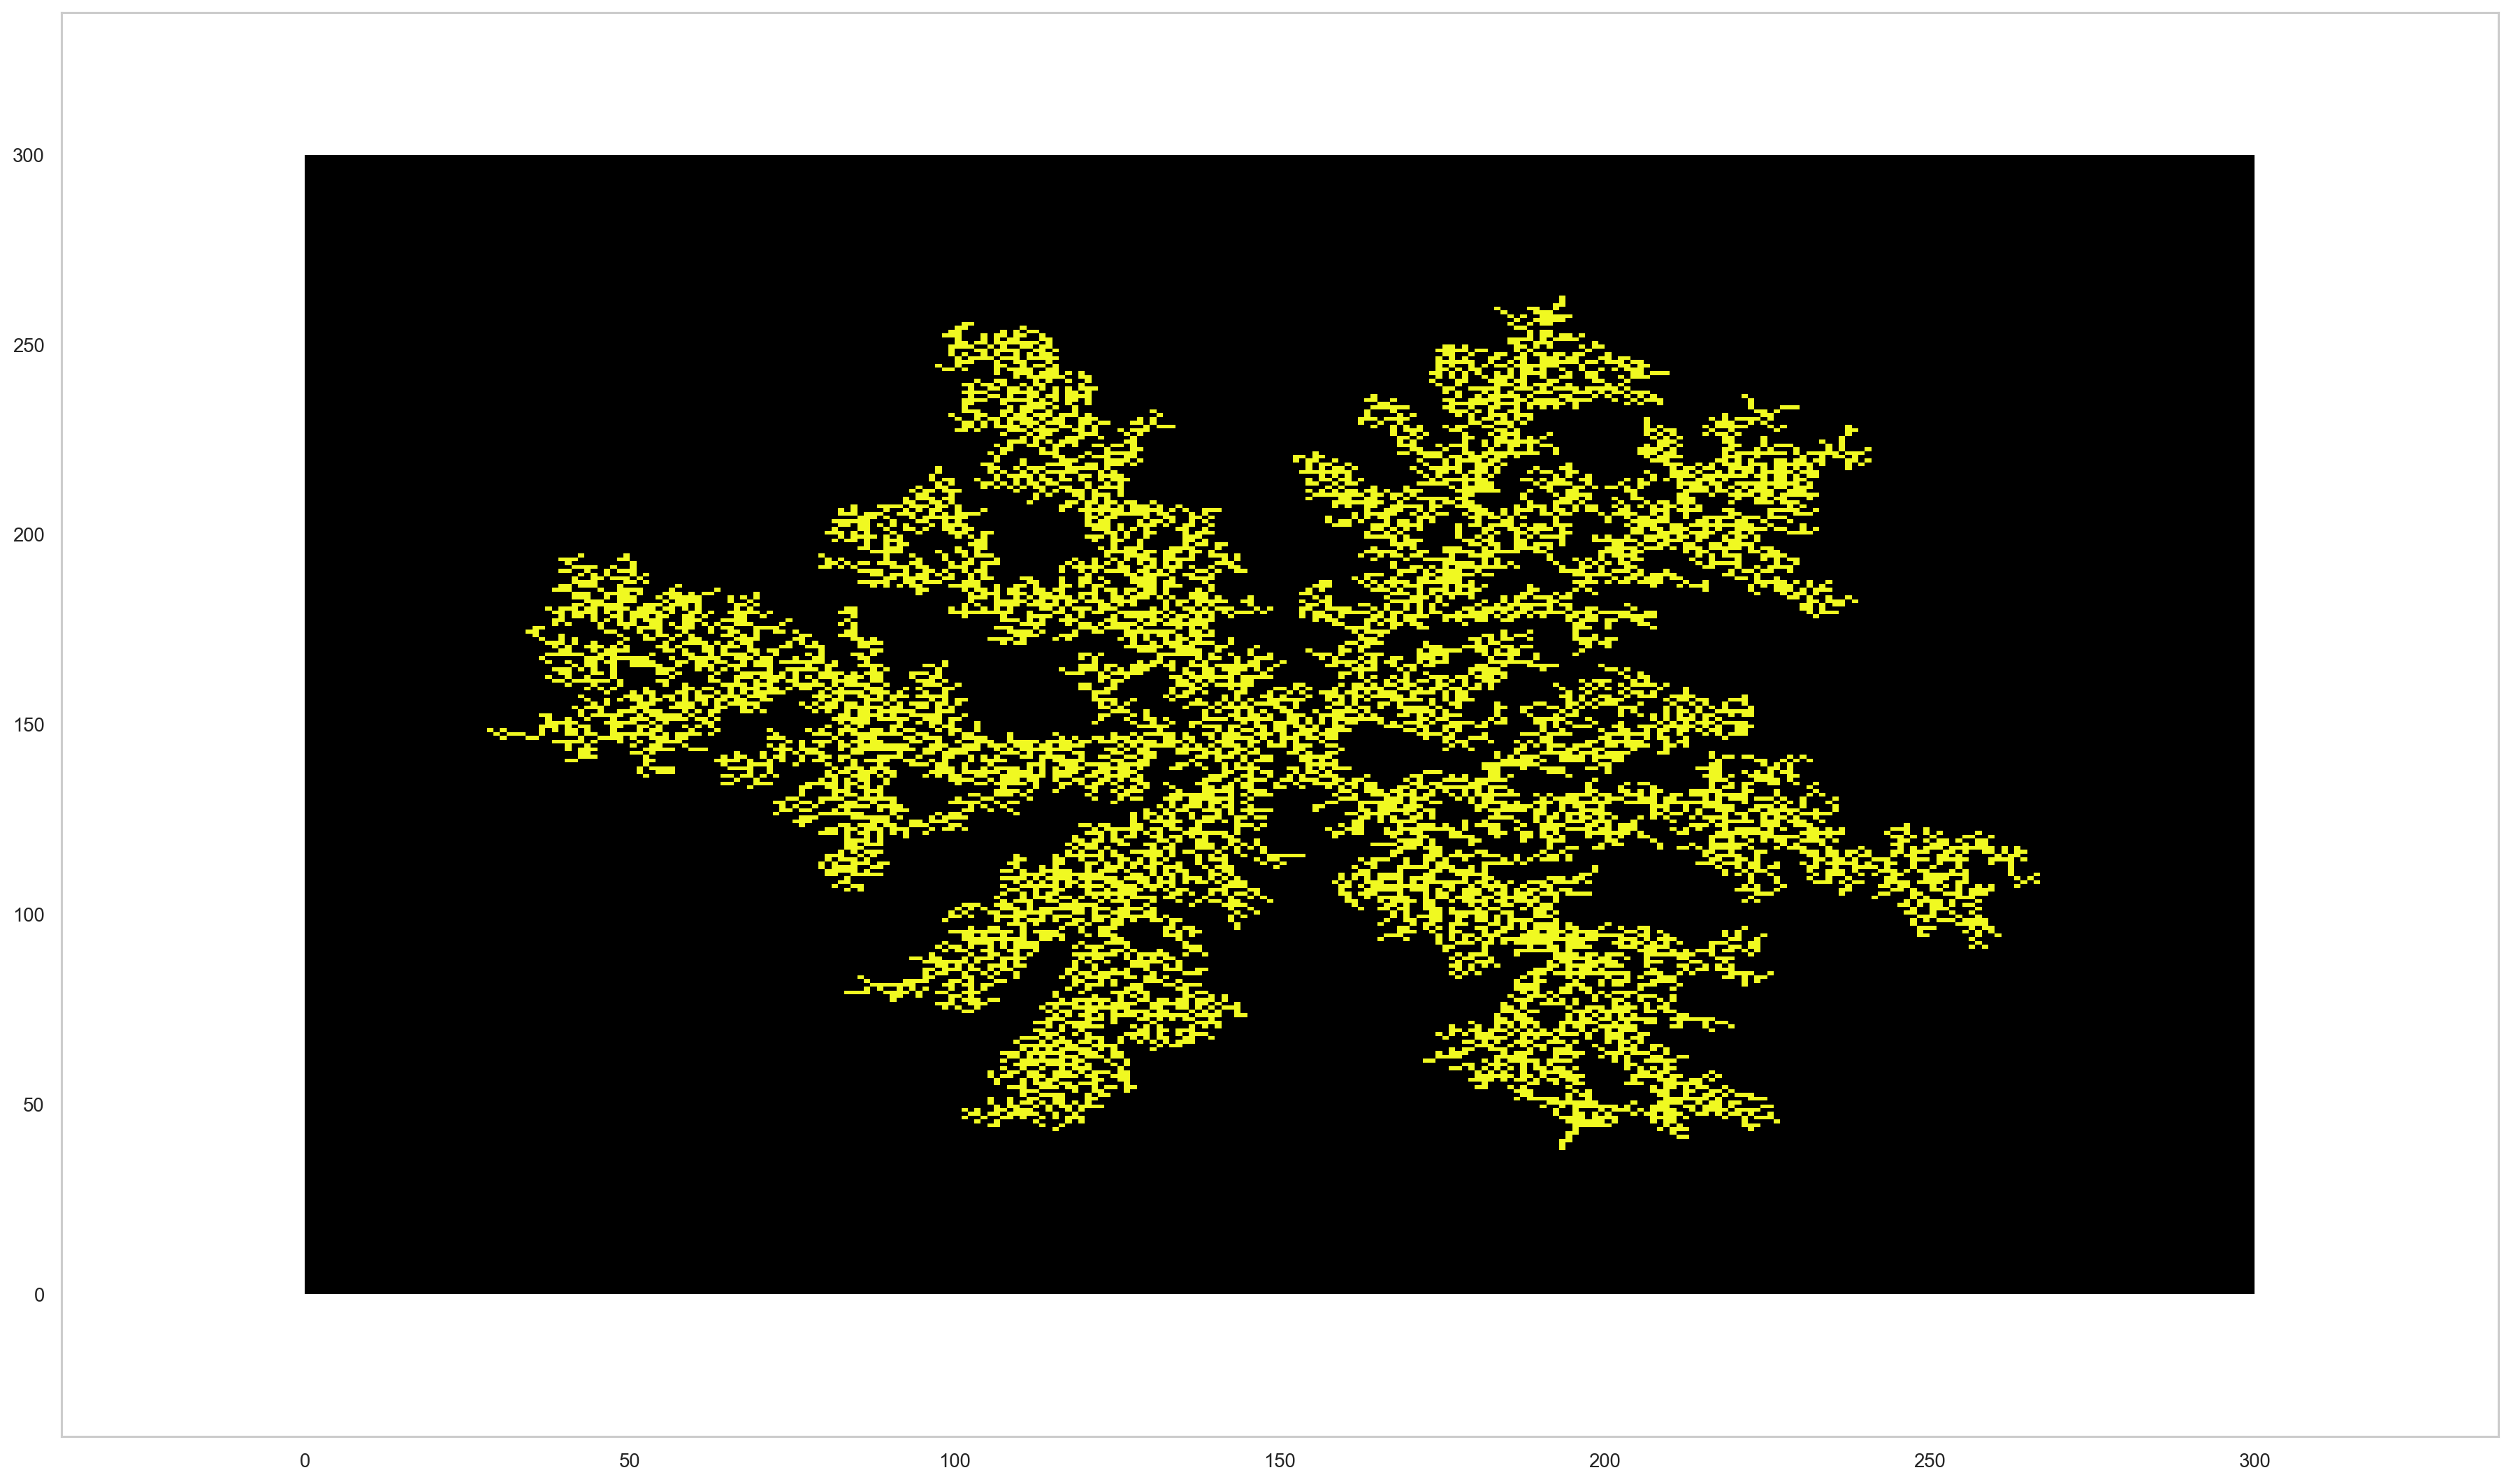

In [5]:
## with sticking prob 0.05

latticeRadiusMax=150
length=300
plt.figure()
cmap = plt.cm.plasma
cmap.set_under(color='black')
plt.pcolormesh(canvas, cmap=cmap, vmin = 0.0001)
plt.xlim((length/2)-(latticeRadiusMax*1.25),(length/2)+(latticeRadiusMax*1.25))
plt.ylim((length/2)-(latticeRadiusMax*1.25),(length/2)+(latticeRadiusMax*1.25))
plt.pause(0.1)

/var/folders/my/1126m1255k36stt7f2r98h_w0000gq/T/ipykernel_33200/4160135263.py:7: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("plasma").copy()
  cmap.set_under(color='black')
/var/folders/my/1126m1255k36stt7f2r98h_w0000gq/T/ipykernel_33200/4160135263.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(canvas, cmap=cmap, vmin = 0.0001)


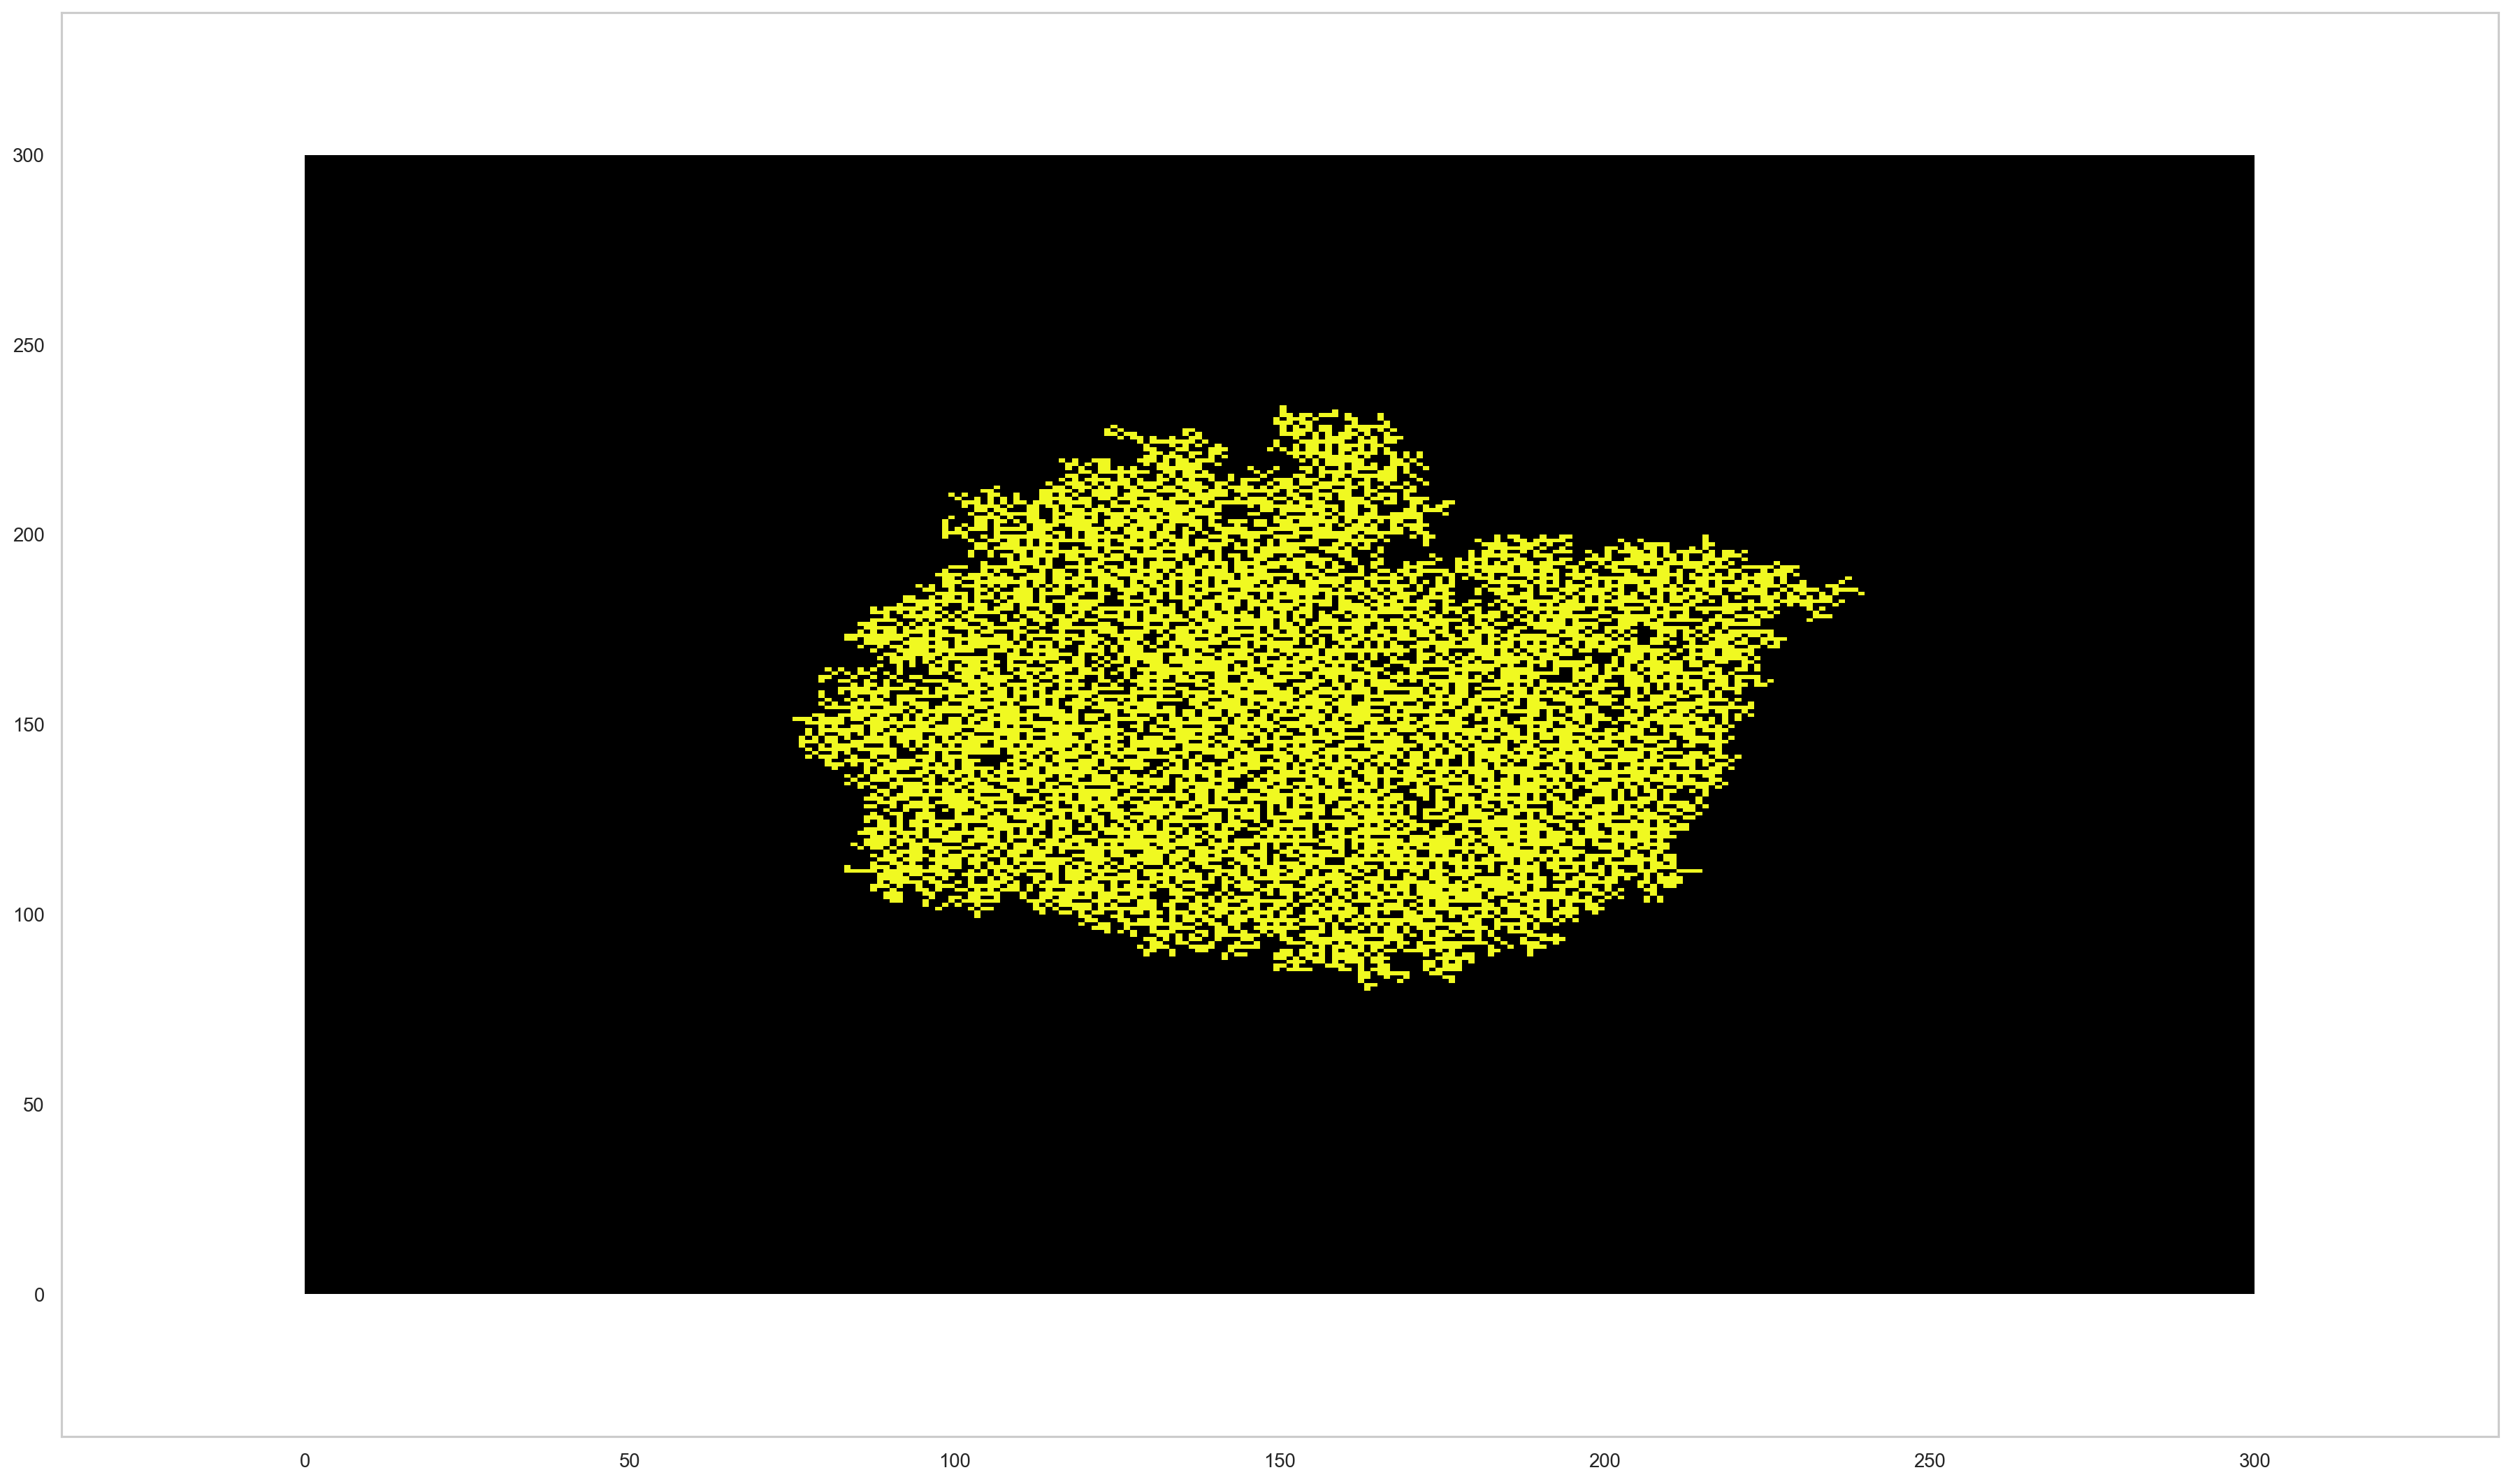

In [8]:
## with sticking prob 0.005

latticeRadiusMax=150
length=300
plt.figure()
cmap = plt.cm.plasma
cmap.set_under(color='black')
plt.pcolormesh(canvas, cmap=cmap, vmin = 0.0001)
plt.xlim((length/2)-(latticeRadiusMax*1.25),(length/2)+(latticeRadiusMax*1.25))
plt.ylim((length/2)-(latticeRadiusMax*1.25),(length/2)+(latticeRadiusMax*1.25))
plt.pause(0.1)